## Assignment 2
### Name: Subash Rokka
### StudentID: c0916455

#### Importing Necessary Libraris and reading data sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [4]:
df_train.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [56]:
df_train['ssc_b'].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

In [57]:
df_train['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl_no   43 non-null     int64  
 1   gender  43 non-null     int64  
 2   salary  43 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [9]:
df_test.isna().sum()

sl_no     0
gender    0
salary    0
dtype: int64

In [5]:
df_train.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
df_test.isna().sum()

sl_no     0
gender    0
salary    0
dtype: int64

In [12]:
df_train[df_train['salary'].isna()]['status'].value_counts()

status
Not Placed    67
Name: count, dtype: int64

## All of the null salary are records of those student who haven't secure placement

In [17]:
# Filling null value with zero as they dont have any income
df_train['salary'] = df_train['salary'].fillna(0)

C:\Users\subas\AppData\Local\Temp\ipykernel_18632\3484035990.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['salary'] = df_train['salary'].fillna(0)


In [18]:
df_train.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [50]:
df_courses = df_train.groupby(['hsc_s','status']).agg(counts = ('hsc_s','count')).reset_index()
df_courses
px.bar(df_courses, x='hsc_s', y = 'counts', 
       color='status',
       barmode='group',
       labels={'x': 'Courses', 'y': 'Number of Students'}, 
       title='Number of student securing placement in each courses')


c:\Users\subas\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [51]:
df_courses = df_train.groupby(['degree_t','status']).agg(counts = ('hsc_s','count')).reset_index()
df_courses
px.bar(df_courses, x='degree_t', y = 'counts', 
       color='status',
       barmode='group',
       labels={'x': 'Courses', 'y': 'Number of Students'}, 
       title='Number of student securing placement in each stream')

c:\Users\subas\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [52]:
df_courses = df_train.groupby(['specialisation','status']).agg(counts = ('hsc_s','count')).reset_index()
px.bar(df_courses, x='specialisation', y = 'counts', 
       labels={'x': 'Courses', 'y': 'Number of Students'}, 
       color='status',
       barmode='group',
       title='Number of student in each courses')


c:\Users\subas\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [54]:
df_exp = df_train.groupby(['workex', 'status']).agg(counts = ('status','count')).reset_index()
px.bar(df_exp, x = 'workex', y = 'counts',
       color='status',
       barmode='group',
       title='Student with work experience')


c:\Users\subas\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Data Preprocessing

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge



In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 25.3+ KB


In [85]:

numerical_cols = ['sl_no', 'gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
categorical_cols_onehotencoding = ['hsc_s', 'degree_t', 'workex', 'specialisation']  # Multi-class categorical columns
categorical_cols_labelencoding = ['ssc_b', 'hsc_b', 'status']  # Binary categorical columns

# Define transformers for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())                  # Scale numerical features
])

# Define transformers for one-hot encoding
categorical_transformer_onehot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))       # One-hot encoding for multi-class categories
])

# Define transformers for label encoding (for binary categories)
categorical_transformer_label = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
])

# Combine transformers in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', numerical_transformer, numerical_cols),
        ('cat_pipeline_onehot', categorical_transformer_onehot, categorical_cols_onehotencoding),
        ('cat_pipeline_label', categorical_transformer_label, categorical_cols_labelencoding)
    ]
)

# Create the overall pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transform the data
X_train_tr = pipeline.fit_transform(df_train)

# Manually label encode binary categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols_labelencoding:
    if col in df_train.columns:
        df_train[col] = label_encoder.fit_transform(df_train[col])


transformed_df = pd.DataFrame(X_train_tr)
print(transformed_df.head())

# Verify the transformed data types
print(transformed_df.dtypes)


         0         1         2         3         4         5         6    7   \
0 -1.724013 -0.739434 -0.028087  2.268812 -1.140102 -1.291091 -0.597647  0.0   
1 -1.707901 -0.739434  1.113369  1.103448  1.513267  1.087157  0.687620  0.0   
2 -1.691789 -0.739434 -0.213238  0.153313 -0.322843  0.218908 -0.769474  0.0   
3 -1.675677 -0.739434 -1.046417 -1.318339 -1.957362 -0.460592 -0.489396  0.0   
4 -1.659564 -0.739434  1.712332  0.668391  0.943909  1.864806 -1.164676  0.0   

    8    9    10   11   12   13   14   15   16  
0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  
1  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
1

In [88]:
X = transformed_df.drop(16, axis=1)
y = transformed_df[16]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'saga'}
Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Tuning Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Evaluation Metrics for Logistic Regression:
Accuracy: 0.93
Precision: 0.92
Recall: 1.00
F1 Score: 0.96


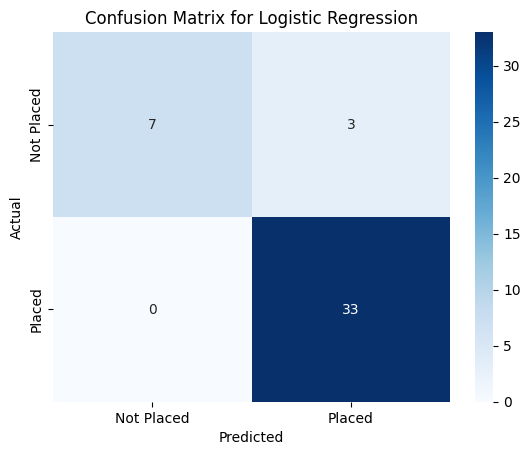


Evaluation Metrics for Random Forest:
Accuracy: 0.88
Precision: 0.89
Recall: 0.97
F1 Score: 0.93


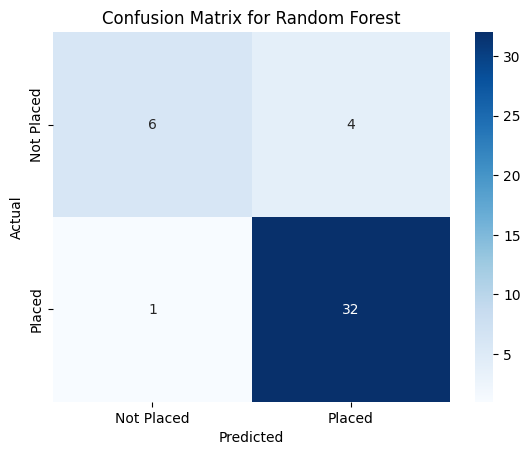


Evaluation Metrics for Support Vector Machine:
Accuracy: 0.93
Precision: 0.97
Recall: 0.94
F1 Score: 0.95


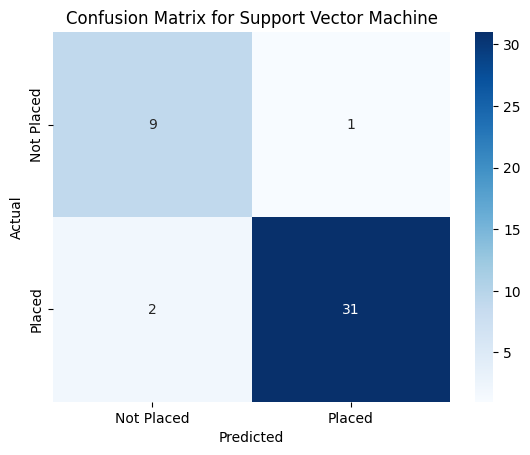

In [92]:
# Step 1: Model Selection
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Hyperparameter tuning using GridSearchCV
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Support Vector Machine': {
        'C': [0.01, 0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    }
}

best_models = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Step 3: Model Training
trained_models = {}
for model_name, model in best_models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model

# Step 4: Model Evaluation
results = {}
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Step 5: Results Visualization
for model_name, metrics in results.items():
    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    sn.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [95]:
model1 = LogisticRegression(random_state=1)
model2 = RandomForestClassifier(random_state=1)
model3 = SVC(probability=True, random_state=1)  # Use probability=True for VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', model1),
    ('rf', model2),
    ('svc', model3)
], voting='soft')  # Use 'soft' for probabilities, 'hard' for majority voting

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate individual models
models = [model1, model2, model3]
model_names = ['Logistic Regression', 'Random Forest', 'SVM']

# Evaluate the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(f"Voting Classifier Classification Report:\n{classification_report(y_test, y_pred_voting)}")
print(f"Voting Classifier Confusion Matrix:\n{confusion_matrix(y_test, y_pred_voting)}")

Voting Classifier Accuracy: 0.9302325581395349
Voting Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84        10
         1.0       0.94      0.97      0.96        33

    accuracy                           0.93        43
   macro avg       0.92      0.88      0.90        43
weighted avg       0.93      0.93      0.93        43

Voting Classifier Confusion Matrix:
[[ 8  2]
 [ 1 32]]
